In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls

drive/  sample_data/


In [0]:
cd drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
ls

 Keras_Cheat_Sheet_Python.pdf   Notes
 Milage.ipynb                  'Pandas Cheat Sheet 2.pdf'
 MLCS344Third.ipynb             Pandas_Cheat_Sheet.pdf
 ml_p1/                         Prototask.data
 ml_p2/                         Scikit_Learn_Cheat_Sheet_Python.pdf
 ml_p3/


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
data = pd.read_csv("Prototask.data", delimiter=" ", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,6,2,1036,103,114,1.00,1.00,172076,355965,2.0,6527,1851864,90
1,1,0,2165,205,101,0.40,1.20,43107,44139,3.0,130,1131931,88
2,62,77,3806,258,166,1.40,1.40,492142,268706,5.2,256,1314590,85
3,5,0,4721,256,177,0.99,2.58,524787,174964,1.0,233,972606,81
4,42,55,3949,249,244,2.60,4.60,197289,529200,3.4,331,1013805,79


In [0]:
columns = []
with open('/content/drive/My Drive/Colab Notebooks/ml_p3/col_names_cpu_small.txt', 'r') as handle:
    columns = [currentline.rstrip() for currentline in handle.readlines()]

columns

['lread',
 'lwrite',
 'scall',
 'sread',
 'swrite',
 'fork',
 'exec',
 'rchar',
 'wchar',
 'runqsz',
 'freemem',
 'freeswap',
 'usr']

# New Section

In [0]:
data.columns = columns
data.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,runqsz,freemem,freeswap,usr
0,6,2,1036,103,114,1.00,1.00,172076,355965,2.0,6527,1851864,90
1,1,0,2165,205,101,0.40,1.20,43107,44139,3.0,130,1131931,88
2,62,77,3806,258,166,1.40,1.40,492142,268706,5.2,256,1314590,85
3,5,0,4721,256,177,0.99,2.58,524787,174964,1.0,233,972606,81
4,42,55,3949,249,244,2.60,4.60,197289,529200,3.4,331,1013805,79


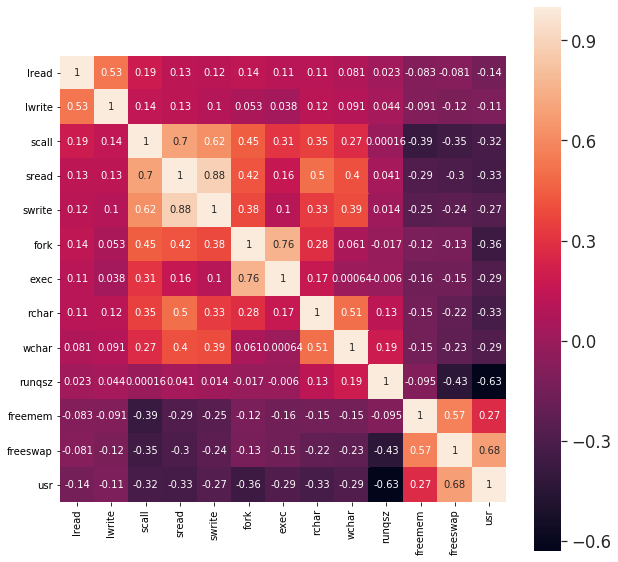

In [0]:
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [0]:
X = data.iloc[:,:-1]
Y = data.iloc[:, -1:]

In [0]:
X

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,runqsz,freemem,freeswap
0,6,2,1036,103,114,1.00,1.00,172076,355965,2.0,6527,1851864
1,1,0,2165,205,101,0.40,1.20,43107,44139,3.0,130,1131931
2,62,77,3806,258,166,1.40,1.40,492142,268706,5.2,256,1314590
3,5,0,4721,256,177,0.99,2.58,524787,174964,1.0,233,972606
4,42,55,3949,249,244,2.60,4.60,197289,529200,3.4,331,1013805
...,...,...,...,...,...,...,...,...,...,...,...,...
8187,74,49,2688,176,103,11.00,32.20,57714,38484,7.0,314,1096333
8188,29,40,1906,118,90,0.80,2.00,8175,27313,3.6,166,1107088
8189,3,0,926,90,67,0.60,1.00,5411,19322,1.0,1177,1020400
8190,4,0,418,30,29,0.80,1.00,3959,10679,2.4,6355,1702592


In [0]:
Y

,usr
0,90
1,88
2,85
3,81
4,79
...,...
8187,69
8188,88
8189,92
8190,96


In [0]:
print("Shape of X is: ", X.shape)
print("Shape of Y is: ", Y.shape)

Shape of X is:  (8192, 12)
Shape of Y is:  (8192, 1)


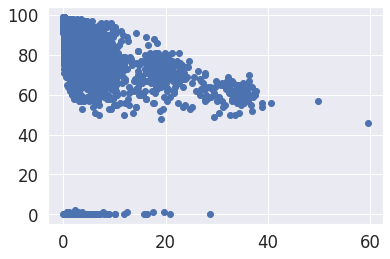

In [0]:
plt.scatter(X['exec'], Y)
plt.show()

In [0]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    for col in col_list:
        if col == "usr":
          break
        i+=1
        plt.subplot(7,2,i)
        plt.plot(X[col],Y,marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

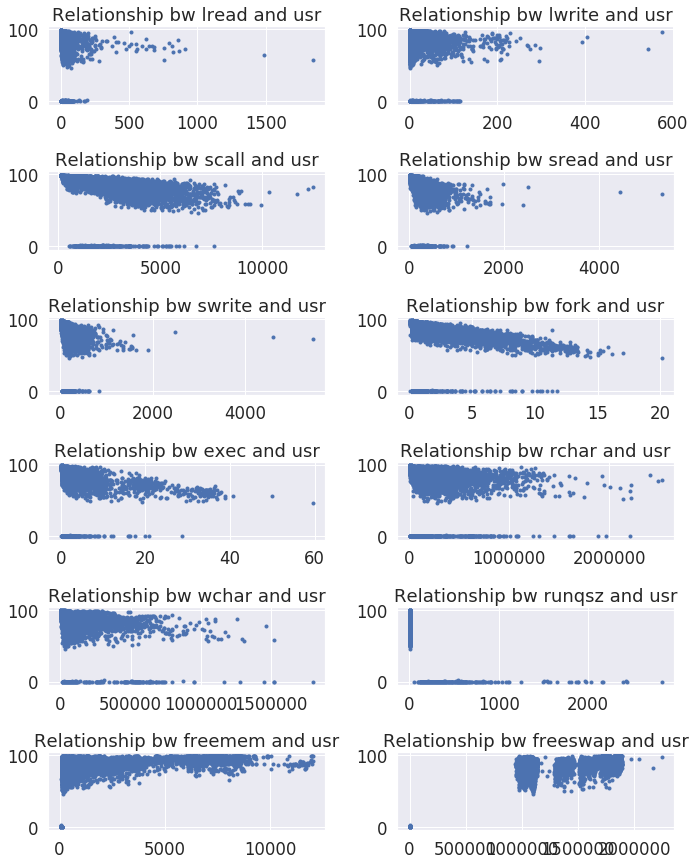

In [0]:
plotFeatures(columns,"Relationship bw %s and usr")

In [0]:
for col in columns:
  print(data[col].dtype)

int64
int64
int64
int64
int64
float64
float64
int64
int64
float64
int64
int64
int64


In [0]:
# X = X.select_dtypes(['float64', 'int64']) 
# this will filter the dataframe out, leaving only the Numerical Features in data

data['usr'] = data['usr'].replace(0, np.NaN)
data

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,runqsz,freemem,freeswap,usr
0,6,2,1036,103,114,1.00,1.00,172076,355965,2.0,6527,1851864,90.0
1,1,0,2165,205,101,0.40,1.20,43107,44139,3.0,130,1131931,88.0
2,62,77,3806,258,166,1.40,1.40,492142,268706,5.2,256,1314590,85.0
3,5,0,4721,256,177,0.99,2.58,524787,174964,1.0,233,972606,81.0
4,42,55,3949,249,244,2.60,4.60,197289,529200,3.4,331,1013805,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,74,49,2688,176,103,11.00,32.20,57714,38484,7.0,314,1096333,69.0
8188,29,40,1906,118,90,0.80,2.00,8175,27313,3.6,166,1107088,88.0
8189,3,0,926,90,67,0.60,1.00,5411,19322,1.0,1177,1020400,92.0
8190,4,0,418,30,29,0.80,1.00,3959,10679,2.4,6355,1702592,96.0


In [0]:
print(data.isnull().sum())

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar         0
wchar         0
runqsz        0
freemem       0
freeswap      0
usr         283
dtype: int64


In [0]:
data['usr'] = data['usr'].replace(1, np.NaN)

In [0]:
print(data.isnull().sum())

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar         0
wchar         0
runqsz        0
freemem       0
freeswap      0
usr         293
dtype: int64


In [0]:
new_data = data.dropna()
new_data

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,runqsz,freemem,freeswap,usr
0,6,2,1036,103,114,1.00,1.00,172076,355965,2.0,6527,1851864,90.0
1,1,0,2165,205,101,0.40,1.20,43107,44139,3.0,130,1131931,88.0
2,62,77,3806,258,166,1.40,1.40,492142,268706,5.2,256,1314590,85.0
3,5,0,4721,256,177,0.99,2.58,524787,174964,1.0,233,972606,81.0
4,42,55,3949,249,244,2.60,4.60,197289,529200,3.4,331,1013805,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,74,49,2688,176,103,11.00,32.20,57714,38484,7.0,314,1096333,69.0
8188,29,40,1906,118,90,0.80,2.00,8175,27313,3.6,166,1107088,88.0
8189,3,0,926,90,67,0.60,1.00,5411,19322,1.0,1177,1020400,92.0
8190,4,0,418,30,29,0.80,1.00,3959,10679,2.4,6355,1702592,96.0


In [0]:
X = new_data.iloc[:,:-1]
Y = new_data.iloc[:, -1:]
print("Shape of X is: ", X.shape)
print("Shape of Y is: ", Y.shape)

Shape of X is:  (7899, 12)
Shape of Y is:  (7899, 1)


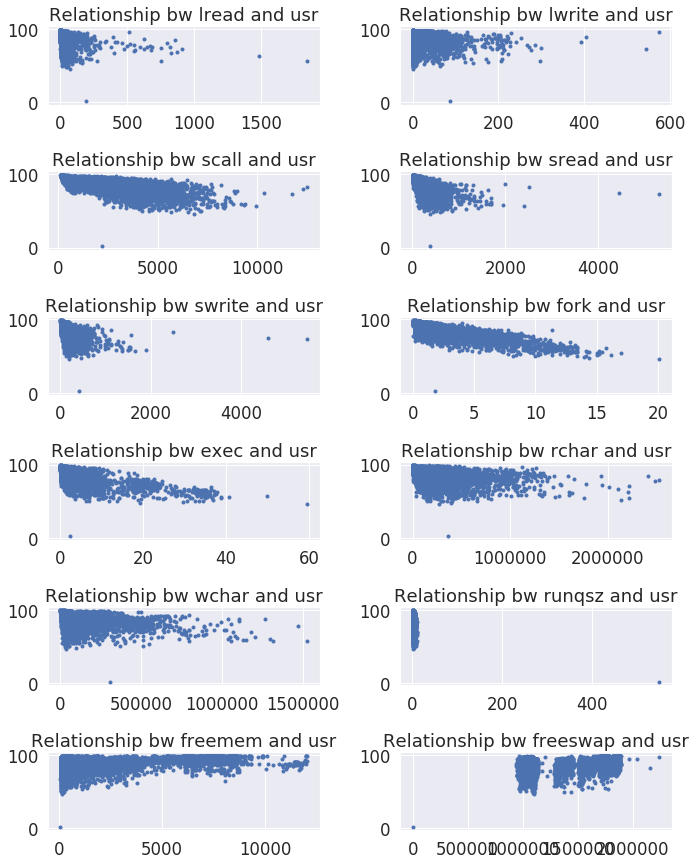

In [0]:
plotFeatures(columns,"Relationship bw %s and usr")

In [0]:
aMax = X.values.max(axis=0) # get the max of each column
aMin = X.values.min(axis=0) # get the min of each column
aMean = X.values.mean(axis=0) # get the mean of each column

def scale_features(training_example):
    return (training_example - aMean) / (aMax - aMin)

scaled_X = scale_features(X.values)
    
scaled_X

array([[-7.24423626e-03, -1.89236942e-02, -1.03006336e-01, ...,
        -6.77924675e-04,  3.93581959e-01,  2.11519299e-01],
       [-9.95426336e-03, -2.24019551e-02, -1.18403149e-02, ...,
         1.14689284e-03, -1.41955923e-01, -1.09425025e-01],
       [ 2.31080673e-02,  1.11511088e-01,  1.20669375e-01, ...,
         5.16149138e-03, -1.31407577e-01, -2.79961015e-02],
       ...,
       [-8.87025252e-03, -2.24019551e-02, -1.11888764e-01, ...,
        -2.50274219e-03, -5.43041860e-02, -1.59145265e-01],
       [-8.32824710e-03, -2.24019551e-02, -1.52909436e-01, ...,
         5.20023324e-05,  3.79182629e-01,  1.44974216e-01],
       [-7.78624168e-03, -2.24019551e-02, -3.42078859e-02, ...,
         4.06660087e-03, -1.65478026e-02,  1.69539441e-01]])

In [0]:
scaled_X = pd.DataFrame(data=scaled_X)
scaled_X.columns = X.columns
scaled_X

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,runqsz,freemem,freeswap
0,-0.007244,-0.018924,-0.103006,-0.019867,-0.006491,-0.044429,-0.030438,-0.007476,0.174106,-0.000678,0.393582,0.211519
1,-0.009954,-0.022402,-0.011840,-0.000665,-0.008877,-0.074250,-0.027080,-0.058525,-0.030784,0.001147,-0.141956,-0.109425
2,0.023108,0.111511,0.120669,0.009313,0.003052,-0.024549,-0.023722,0.119214,0.116771,0.005161,-0.131408,-0.027996
3,-0.007786,-0.022402,0.194555,0.008936,0.005071,-0.044926,-0.003910,0.132136,0.055177,-0.002503,-0.133333,-0.180452
4,0.012268,0.073250,0.132217,0.007618,0.017367,0.035094,0.030006,0.002504,0.287933,0.001877,-0.125129,-0.162085
...,...,...,...,...,...,...,...,...,...,...,...,...
7894,0.029612,0.062815,0.030392,-0.006124,-0.008510,0.452589,0.493404,-0.052743,-0.034500,0.008446,-0.126552,-0.125295
7895,0.005222,0.047163,-0.032754,-0.017043,-0.010895,-0.054370,-0.013648,-0.072352,-0.041840,0.002242,-0.138942,-0.120500
7896,-0.008870,-0.022402,-0.111889,-0.022314,-0.015116,-0.064310,-0.030438,-0.073446,-0.047091,-0.002503,-0.054304,-0.159145
7897,-0.008328,-0.022402,-0.152909,-0.033609,-0.022090,-0.054370,-0.030438,-0.074021,-0.052770,0.000052,0.379183,0.144974


In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(score_func=f_classif ,k=8)
fit = bestfeatures.fit(scaled_X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
filter1 = featureScores.nlargest(8,'Score')
filter1

,Specs,Score
9,runqsz,3550.943766
5,fork,364.817794
2,scall,180.299680
6,exec,165.944754
3,sread,95.920923
4,swrite,64.279880
7,rchar,47.443108
11,freeswap,47.223234


In [0]:
best_columns = list(filter1['Specs'])
best_columns

['runqsz', 'fork', 'scall', 'exec', 'sread', 'swrite', 'rchar', 'freeswap']

In [0]:
best_scaled_X = scaled_X[best_columns]
best_scaled_X

,runqsz,fork,scall,exec,sread,swrite,rchar,freeswap
0,-0.000678,-0.044429,-0.103006,-0.030438,-0.019867,-0.006491,-0.007476,0.211519
1,0.001147,-0.074250,-0.011840,-0.027080,-0.000665,-0.008877,-0.058525,-0.109425
2,0.005161,-0.024549,0.120669,-0.023722,0.009313,0.003052,0.119214,-0.027996
3,-0.002503,-0.044926,0.194555,-0.003910,0.008936,0.005071,0.132136,-0.180452
4,0.001877,0.035094,0.132217,0.030006,0.007618,0.017367,0.002504,-0.162085
...,...,...,...,...,...,...,...,...
7894,0.008446,0.452589,0.030392,0.493404,-0.006124,-0.008510,-0.052743,-0.125295
7895,0.002242,-0.054370,-0.032754,-0.013648,-0.017043,-0.010895,-0.072352,-0.120500
7896,-0.002503,-0.064310,-0.111889,-0.030438,-0.022314,-0.015116,-0.073446,-0.159145
7897,0.000052,-0.054370,-0.152909,-0.030438,-0.033609,-0.022090,-0.074021,0.144974


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(best_scaled_X, Y, test_size=0.15, random_state=4)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6714, 8)
(1185, 8)
(6714, 1)
(1185, 1)


#Link for Linear Regression Theory: https://towardsdatascience.com/linear-regression-understanding-the-theory-7e53ac2831b5

#Link for Multiple Linear Regression Theory: https://www.ritchieng.com/multi-variable-linear-regression/
---

y_pred = Prediction or Hypotheses[denoted by h_theta(x)]
---

y = Actual Target Variable Value 
---
---

###Cost Function a.k.a J(Theta) used - Mean Squared Error
Mean Squared Error(MSE) E = 1∕n ∑(y - y_pred)² 
---
---


y_pred = mx + c if there is only 1 independent feature x

m = slope, c = co-efficient

y_pred = theta_0.x_0 + theta_1.x_1 +.....+theta_n.x_n if there are multiple independent features x_0, x_1, ..., x_n

where this could be a possibility c = theta_0, m = theta_1 

---


#Theta = [theta_0, theta_1,....,theta_n]
#Theta = Parameters of our model that we have to train(update) after looking at training examples
---

n = number of features(columns)

m = number of examples(rows) in our training data

# X and Theta are represented as a Matrix and a Vector(1-D Matrix)



Y_pred = Theta Transpose * X
---
Can be achieved as X matrix multiplication Theta

Y_pred = X@theta
L = Learning Rate or α
---

D_theta = Partial Derivative of E wrt theta
---

---
D_theta = 1/2m((xTheta-y)Transpose)(xTheta-y)

Updation Rule: Theta = Theta - L * D_theta
---


In [0]:
X_matr = np.matrix(X_train)
y_matr = np.matrix(Y_train) # shape is still invalid, needs to be a vector
y_matr = y_matr.T # fix y_matr so that it represents a vector

X_matr = np.append(np.ones((X_matr[:, 0].size, 1)), X_matr, axis=1) # add our x_0 = 1 elements to each row
theta = np.zeros((X_matr.shape[1], 1)) # (theta_0, theta_1, ... theta_n)

In [0]:
X_matr

matrix([[ 1.00000000e+00,  1.51185635e-03,  2.51531701e-02, ...,
          3.16812894e-02, -3.65583228e-02, -1.61452713e-01],
        [ 1.00000000e+00, -2.13777869e-03, -8.41907663e-02, ...,
         -2.15394851e-02, -7.35817845e-02,  2.09970153e-01],
        [ 1.00000000e+00, -3.12961171e-04, -4.66790345e-03, ...,
          4.33682249e-03, -7.70587003e-03,  6.90375174e-02],
        ...,
        [ 1.00000000e+00,  5.20023324e-05, -7.42504084e-02, ...,
          1.60820969e-02, -1.62814118e-02, -2.94763219e-03],
        [ 1.00000000e+00,  1.87681985e-03, -5.43696927e-02, ...,
         -1.36481289e-02,  3.58574071e-02,  6.12842075e-02],
        [ 1.00000000e+00,  1.14689284e-03,  1.04676033e-01, ...,
         -1.07118103e-02, -4.12765530e-02, -1.68350983e-01]])

In [0]:
y_matr

matrix([[82., 86., 89., ..., 85., 93., 86.]])

In [0]:
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [0]:
def cost_function(X_matr, y_matr):
    global theta
    
    y_pred = X_matr.dot(theta)
    
    diff = y_pred - y_matr
    sqErr = np.power(diff, 2)
    m = y_matr.size
    
    return (1.0 /(2 * m)) * sqErr.sum()

cost_function(X_matr, y_matr)

25697067.0

In [0]:
def gradient(m, y_pred, y, x_hat_i):
    return (1.0 / m) * ((y_pred - y).T.dot(x_hat_i)).sum()

In [0]:
X_arr = np.array(X_matr) 
y_arr = np.array(y_matr) 

def gradient_descent(X, y, num_iter, alpha):
    global theta # so we don't save to a "local" theta, but to the "global" theta
    plot_arr = []
    
    m = X.shape[0] # m is the amount of rows
    n = X.shape[1] # n is the amount of columns or features (x_0, x_1, x_2, ... x_n)
    
    for i in range(num_iter):
        for j in range(n):
            y_pred = X.dot(theta)
            theta[j, 0] = theta[j, 0] - (alpha * gradient(m, y_pred, y, X[:, j])) # save to "global" theta
        plot_arr.append(cost_function(X_matr, y_matr))

    return plot_arr, theta

In [0]:
theta = np.zeros((X_matr.shape[1], 1)) # (theta_0, theta_1, ... theta_n)
print('Before: ', cost_function(X_matr, y_matr))

theta = np.zeros((X_matr.shape[1], 1)) # (theta_0, theta_1, ... theta_n)
plot_arr, training_params = gradient_descent(X_arr, y_arr, 10, 0.00035)
print('After: ', cost_function(X_matr, y_matr))

Before:  25697067.0
After:  10261696078.82115


In [0]:
plot_arr

[46599798.17959281,
 84688943.03584804,
 154095507.93832317,
 280568878.5946386,
 511030267.17873883,
 930979589.3854731,
 1696216394.4517314,
 3090639721.7740135,
 5631574689.871112,
 10261696078.82115]

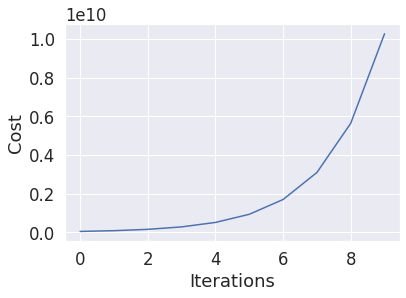

In [0]:
plt.plot(plot_arr)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#This is BAD!

#The cost is increasing instead of decreasing

In [0]:
theta = np.zeros((X_matr.shape[1], 1)) # (theta_0, theta_1, ... theta_n)
print('Before: ', cost_function(X_matr, y_matr))

theta = np.zeros((X_matr.shape[1], 1)) # (theta_0, theta_1, ... theta_n)
plot_arr, training_params = gradient_descent(X_arr, y_arr, 20, 0.00025)
print('After: ', cost_function(X_matr, y_matr))

Before:  25697067.0
After:  274538.97567402624


In [0]:
plot_arr

[11978028.61449737,
 5662340.716835773,
 2754860.8517519445,
 1416374.0900925791,
 800191.2086605282,
 516524.9144912198,
 385937.2029957388,
 325819.56577111414,
 298144.11880021356,
 285403.3018050452,
 279538.0498158923,
 276837.8508055079,
 275594.8266170592,
 275022.55359662033,
 274759.1147702656,
 274637.8207381339,
 274581.9845494104,
 274556.27028403804,
 274544.4315622914,
 274538.97567402624]

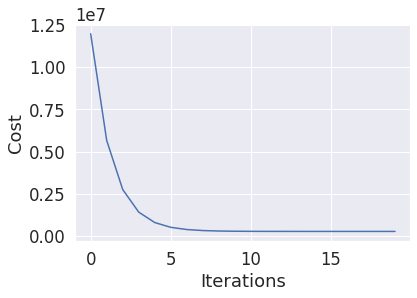

In [0]:
plt.plot(plot_arr)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [0]:
theta

array([[ 8.69857933e+01],
       [-7.17039016e-04],
       [-1.91910002e-02],
       [-2.40750315e-02],
       [-1.81199637e-02],
       [-3.19012192e-03],
       [-6.84516582e-03],
       [ 2.53118695e-02],
       [-1.01642446e-02]])

In [0]:
train_plot_arr = cost_function(X_matr, y_matr)
train_plot_arr

274538.97567402624

In [0]:
X_matr = np.matrix(X_test)
y_matr = np.matrix(Y_test) # shape is still invalid, needs to be a vector
y_matr = y_matr.T # fix y_matr so that it represents a vector
X_matr = np.append(np.ones((X_matr[:, 0].size, 1)), X_matr, axis=1) # add our x_0 = 1 elements to each row


test_plot_arr = []
    
test_plot_arr.append(cost_function(X_matr, y_matr))

In [0]:
test_plot_arr

[41970.00610787522]

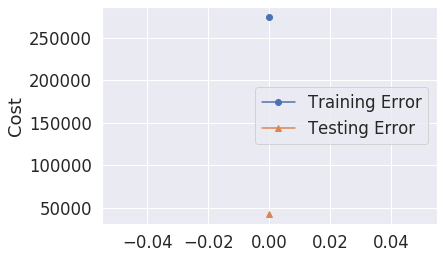

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(train_plot_arr, label='Training Error', marker='o')
ax.plot(test_plot_arr, label='Testing Error', marker='^')
ax.legend()
plt.ylabel('Cost')
plt.show()

# MSE is not a good way to do this. Since the size of the training and testing sets  are different.

#We should use The ratio of training size to test size

In [0]:
approx_test_error = 41970.006 * (0.85/0.15)  
approx_test_error

237830.034

#This is almost equal to Training Error